# <center>TSF TASK 4 - GRIP MARCH'21</center>
# <center>ADITYA AMBWANI<center>

# <center>Exploratory Data Analysis - Terrorism<center>

### Objective:-
- Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism'
- As a security/defense analyst, try to find out the hot zone of terrorism.
- What all security issues and insights you can derive by EDA?

In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install wordcloud

In [5]:
# Reading our dataset
data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='Latin1')
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
# Calculating coloumns and rows 
data.shape

(181691, 135)

In [7]:
# Seeing all the headings of coloumn
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
# Checking for some more information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
# Describing the dataset in a summarized way
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Checking for null values in our dataset
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [11]:
# Dropping all the null values
# data.dropna(axis=1,inplace=True)
# data.isnull().sum()

In [12]:
# Seeing correlation between different variables
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


## Visualising Dataset

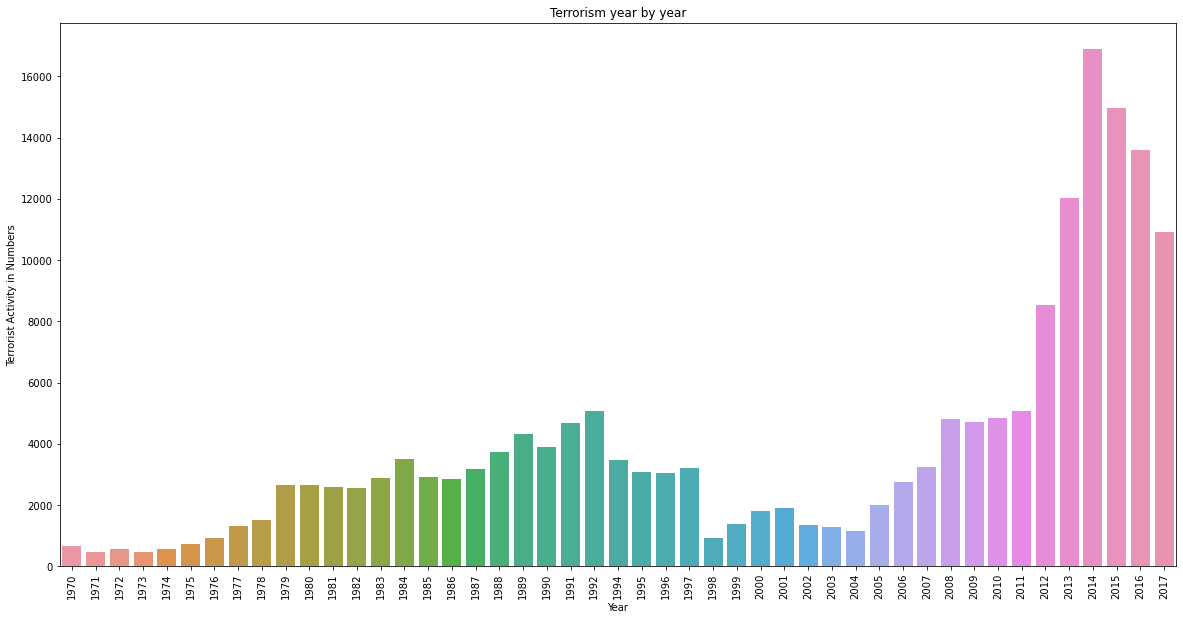

In [13]:
# Plotting terrorism year by year
plt.subplots(figsize=(20,10))
sns.countplot(x=data['iyear'])
plt.ylabel('Terrorist Activity in Numbers')
plt.xlabel('Year')
plt.title("Terrorism year by year")
plt.xticks(rotation=90)
plt.show()

Conclusion:- Most number of terrorist attacks happened in 2014.

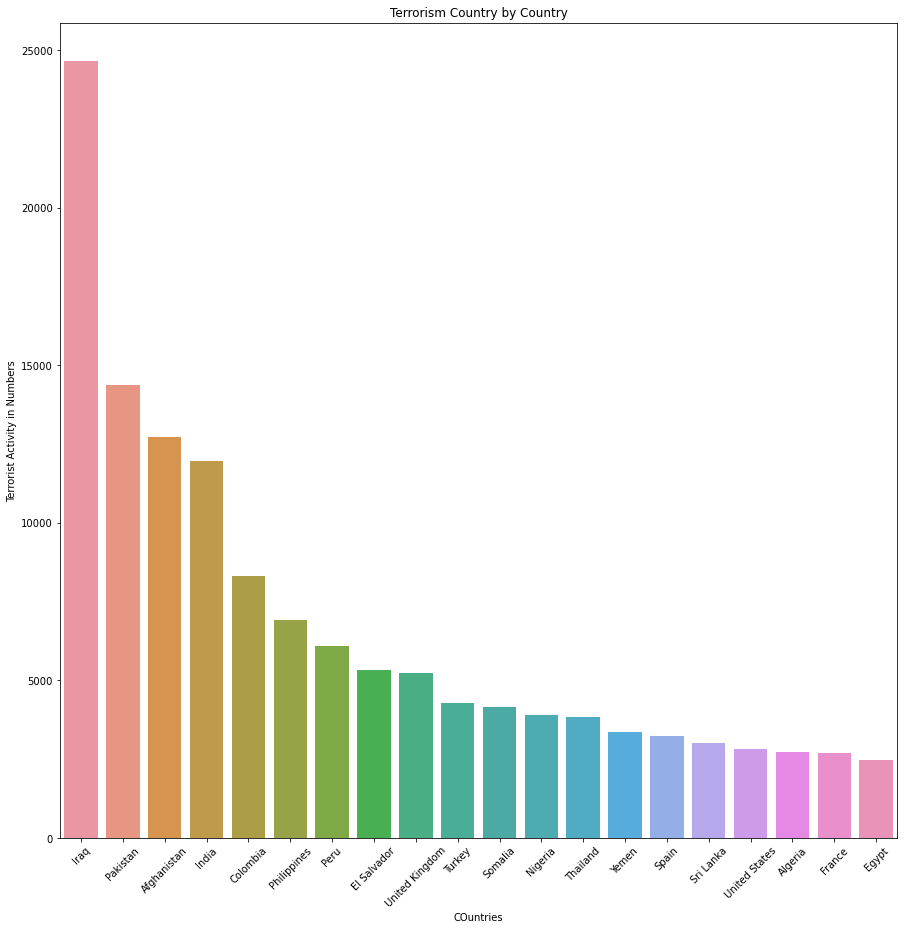

In [14]:
# Plotting terrorism country by country
plt.subplots(figsize=(15,15))
sns.barplot(x=data['country_txt'].value_counts()[:20].index,y=data['country_txt'].value_counts()[:20].values)
plt.ylabel('Terrorist Activity in Numbers')
plt.xlabel('COuntries')
plt.title("Terrorism Country by Country")
plt.xticks(rotation=45)
plt.show()

Conclsuion:- Most terrorist activities happend in Iraq till now with more than 23000 attacks in numbers.

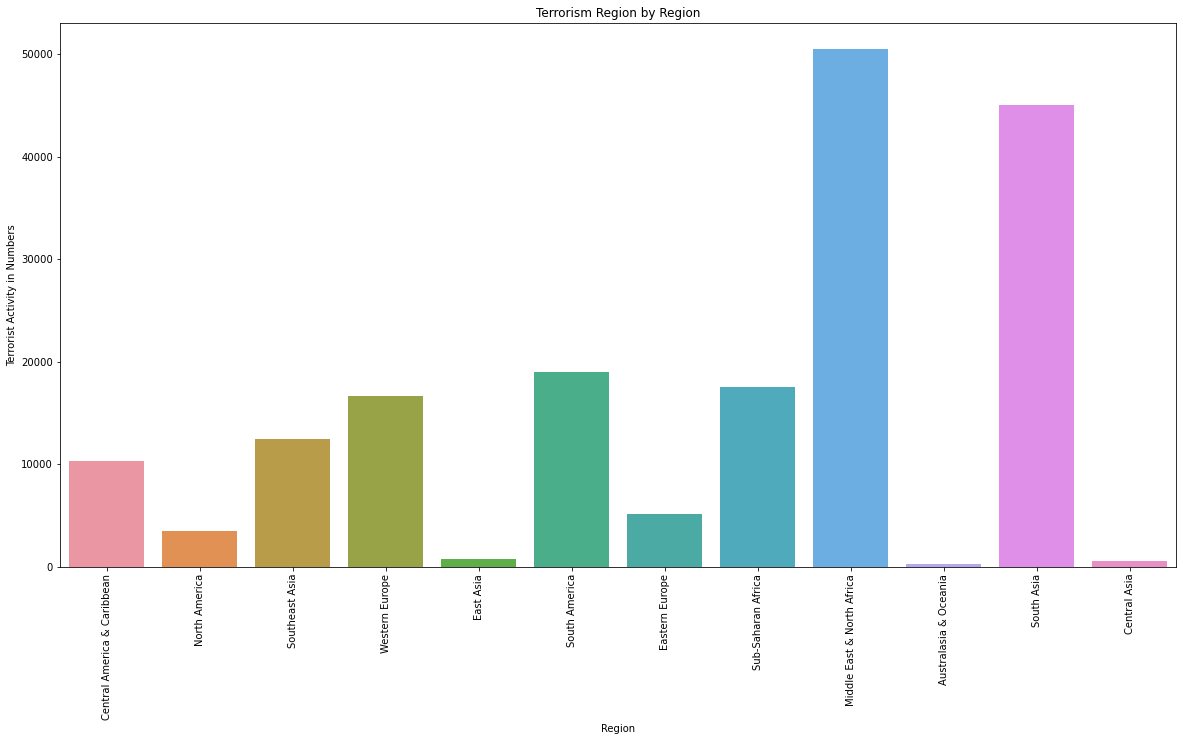

In [15]:
# Plotting terrorism region by region
plt.subplots(figsize=(20,10))
sns.countplot(x=data['region_txt'])
plt.ylabel('Terrorist Activity in Numbers')
plt.xlabel('Region')
plt.title("Terrorism Region by Region")
plt.xticks(rotation=90)
plt.show()

Conclsuion:- Middle East and North Africa has highest number of terrorist activities with nearly 50000 in numbers.

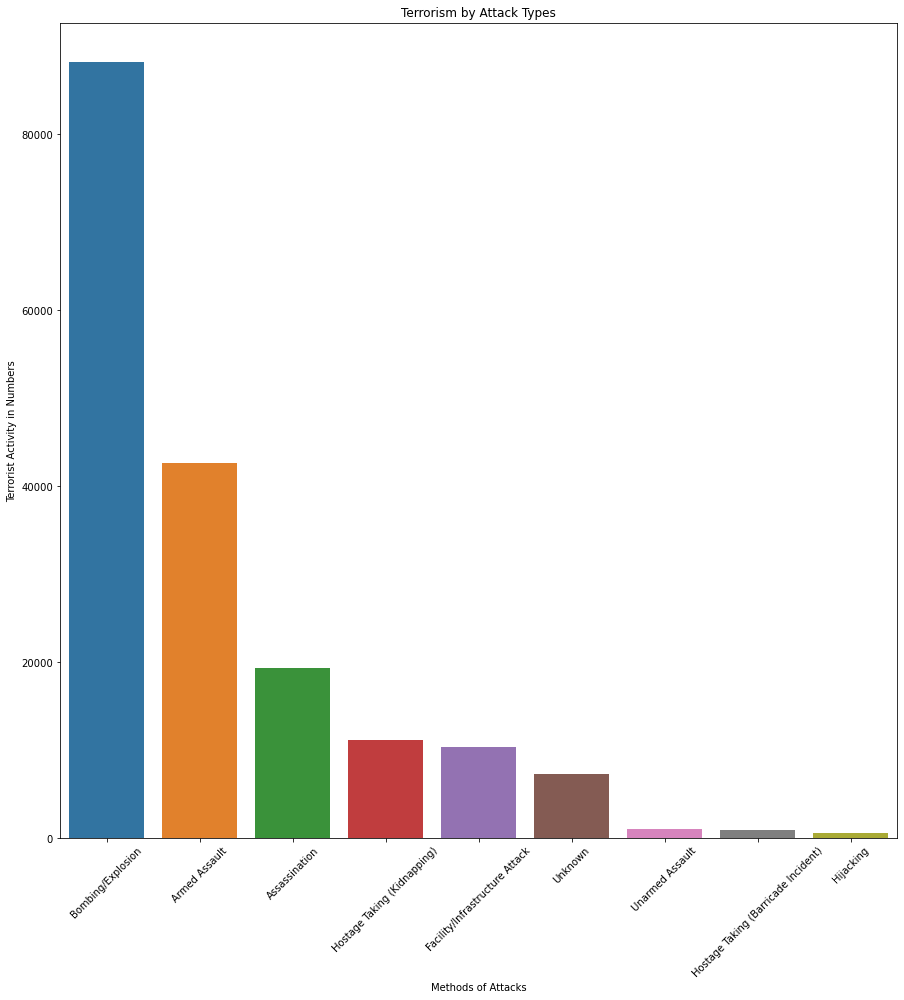

In [16]:
# Plotting terrorism by types of terrorist activities
plt.subplots(figsize=(15,15))
sns.barplot(x=data['attacktype1_txt'].value_counts()[:20].index,y=data['attacktype1_txt'].value_counts()[:20].values)
plt.ylabel('Terrorist Activity in Numbers')
plt.xlabel('Methods of Attacks')
plt.title("Terrorism by Attack Types")
plt.xticks(rotation=45)
plt.show()

Conclsuion:- Bombing/Explosion are the most common methods used for Terrorist Activities with nearly 90000 in numbers.

<AxesSubplot:xlabel='success', ylabel='count'>

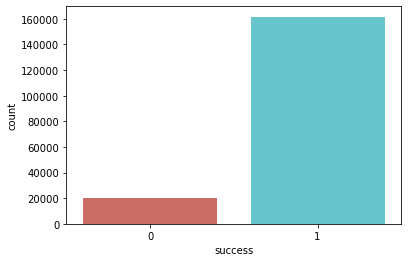

In [17]:
# Successfull Attacks
sns.countplot(x='success', data=data, palette='hls')

Conclusion:- Around 160000 terrorist attacks are successfull and around 20000 are unsccessfull till now.

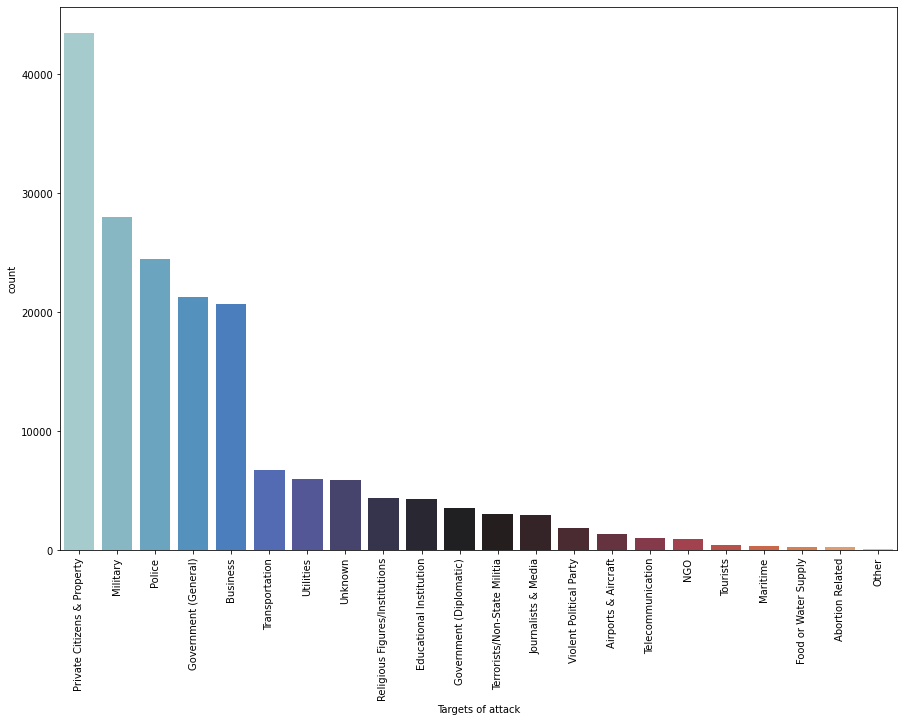

In [18]:
# Plotting targets of attack
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x = 'targtype1_txt', data=data, palette='icefire', order=data['targtype1_txt'].value_counts().index)
_ = plt.xlabel('Targets of attack')
_ = plt.setp(ax.get_xticklabels(), rotation = 90)

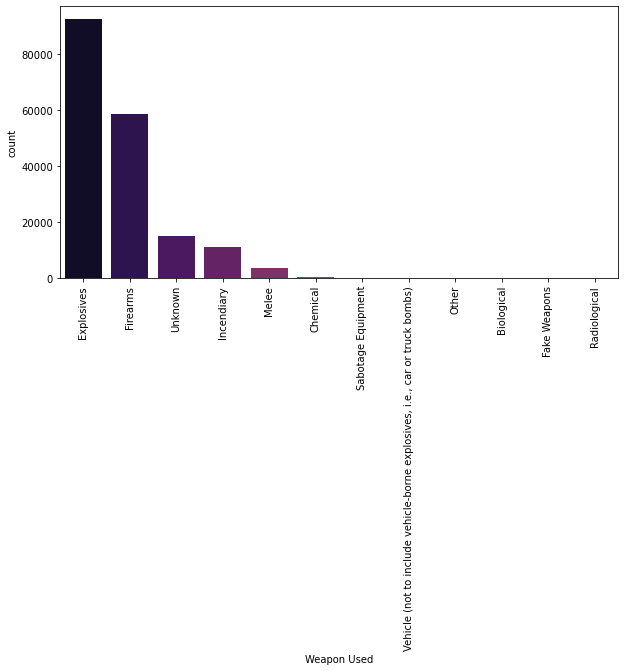

In [19]:
# Plotting weapons of attacks
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='weaptype1_txt', data=data, palette='inferno', order=data['weaptype1_txt'].value_counts().index)
_ = plt.xlabel('Weapon Used')
_ = plt.setp(ax.get_xticklabels(), rotation = 90)

Conclusion:- Weapon that is mostly used in terrorist activities is Explosives.

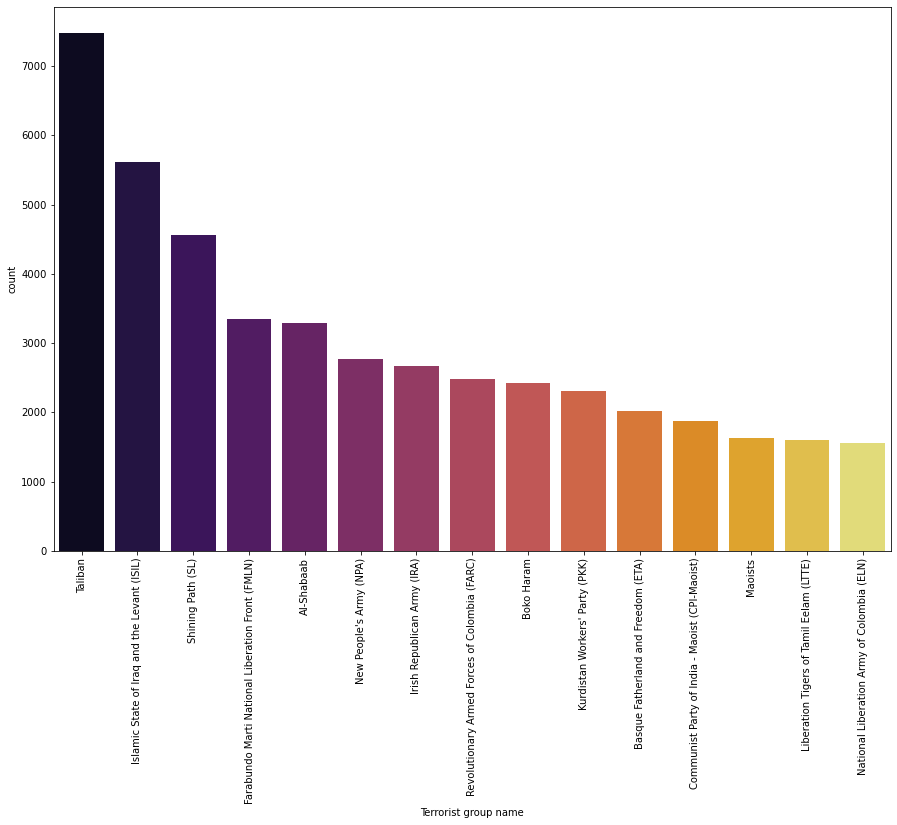

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='gname', data=data, palette='inferno', order=data['gname'].value_counts()[1:16].index)
_ = plt.xlabel('Terrorist group name')
_ = plt.setp(ax.get_xticklabels(), rotation=90) 

Conclusion:- Taliban is the most active terrorist group as the most number of activities has been done by this group.

In [21]:
# Summary of our dataset
print("Country with the most attacks:",data['country_txt'].value_counts().idxmax())
print("City with the most attacks:",data['city'].value_counts().index[1])
print("Region with the most attacks:",data['region_txt'].value_counts().idxmax())
print("Country with the most attacks:",data['country_txt'].value_counts().idxmax())
print("Year with the most attacks:",data['iyear'].value_counts().idxmax())
print("Month with the most attacks:",data['imonth'].value_counts().idxmax())
print("Country with the most attacks:",data['country_txt'].value_counts().idxmax())
print("Country with the most attacks:",data['gname'].value_counts().index[1])
print("Most attacks types:",data['attacktype1_txt'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Country with the most attacks: Iraq
Year with the most attacks: 2014
Month with the most attacks: 5
Country with the most attacks: Iraq
Country with the most attacks: Taliban
Most attacks types: Bombing/Explosion


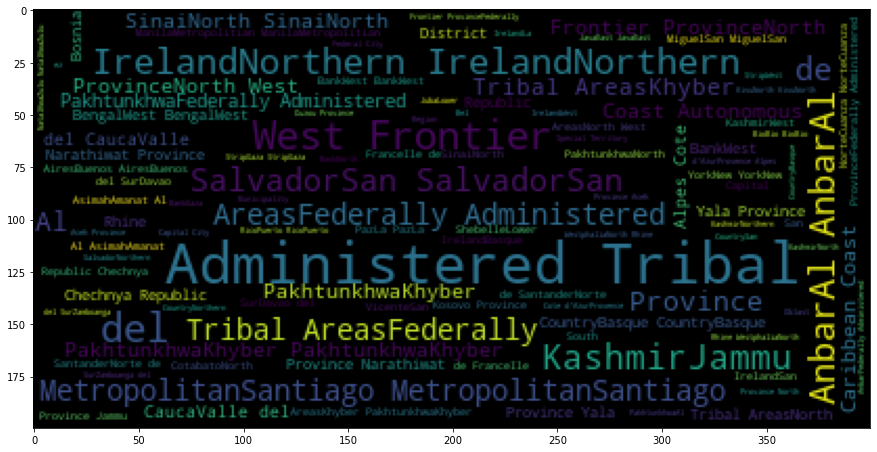

In [35]:
from scipy import signal
from wordcloud import WordCloud
plt.subplots(figsize=(15,20))
wordcloud=WordCloud(background_color='Black').generate(''.join(data['provstate'].dropna(False)))
plt.axis('on')
plt.imshow(wordcloud)
plt.show()